# Amazon Product Reviews Sentiment Analysis in Python

# Steps to be followed:

* Importing Libraries and Datasets
* Preprocessing and cleaning the reviews
* Analysis of the Dataset
* Converting text into Vectors
* Model training, Evaluation, and Prediction

# Importing Libraries and Datasets

Some of the the libraries used are :

* Pandas : For importing the dataset.
* Sklearn : For importing the model, accuracy module, and TfidfVectorizer.
* Warning : To ignore all the warnings
* Matplotlib, Seaborn : To plot the visualization.

In [1]:
#IMPORTING THE DATASET

import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/Amazon Product Review.txt')

In [2]:
import warnings
warnings.filterwarnings('ignore')
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import punkt

In [4]:
dataset.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


The dataframe displayed above contains information on some products, the users as well as their reviews. For this analysis, we will be focusing on the following columns;
“  'review_headline', 'review_body', 'star_rating' and 'sentiment' ".

review_body — This variable contains the complete product review information.

review_headline — This is a summary of the entire review.

star_rating — The product rating provided by the customer.

sentiment — The emotional tone of the review. It's either positive, negative or neutral.

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Printing stopwords in english

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
dataset.shape

(30846, 16)

In [11]:
#CHECKING FOR MISSING VALUES--- our dataset is clean, with no missing values.

dataset.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

# STEP 2: DATA ANALYSIS

In [12]:
#CHECKING FOR THE DISTRIBUTION OF SENTIMENT COLUMNS

dataset['sentiment'].value_counts()

1    25767
0     5079
Name: sentiment, dtype: int64

[Text(0, 0, '20019'),
 Text(0, 0, '5748'),
 Text(0, 0, '2216'),
 Text(0, 0, '1708'),
 Text(0, 0, '1155')]

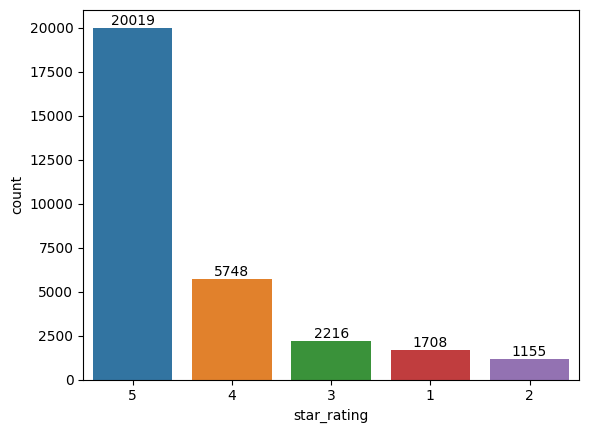

In [13]:
# VISUAL REPRESENTATION OF THE RATINGS

ax = sns.countplot(x=dataset['star_rating'],
                   order=dataset['star_rating'].value_counts(ascending=False).index);

abs_values = dataset['star_rating'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

The graph above shows that most of the ratings are positive. This means that most reviews will be pretty positive too.
We will analyse it by creating some wordclouds to see the most frequently used words in the reviews.

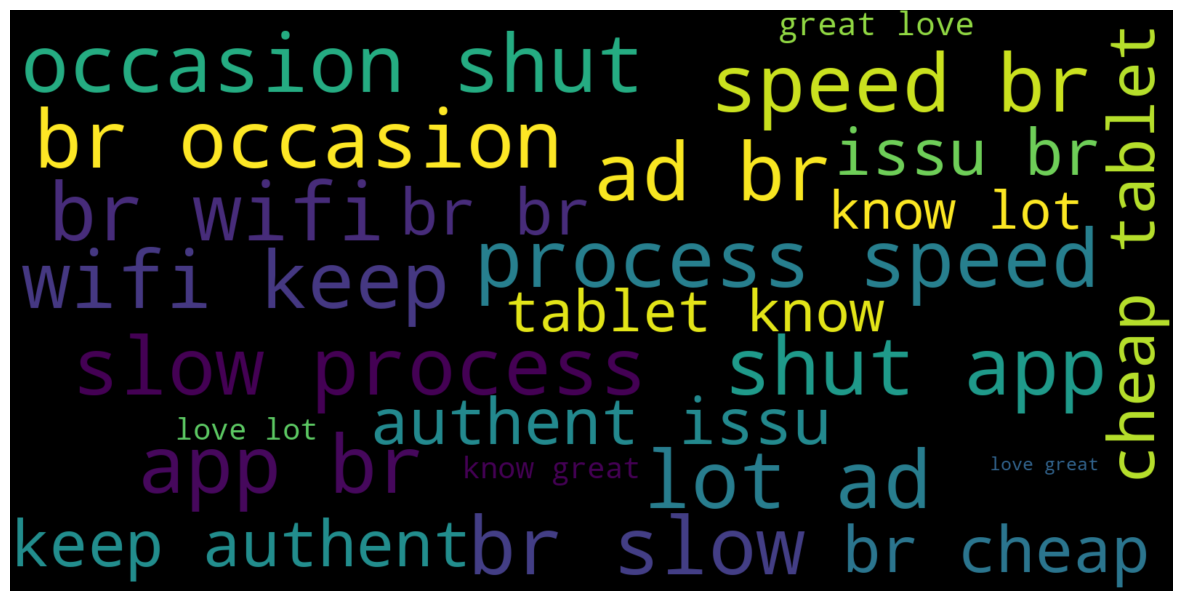

In [46]:
consolidated=' '.join(word for word in dataset['review_body'][dataset['sentiment']].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

These are some of the frequently occuring words in the reviews

Apparently, only ratings with 1 and 2 are classified as negative (0), while ratings from 3 up until 5 are classified as positive (1). There are no neutrals in the dataset..

# STEMMING:**   

It's the process of reducing a word to its root word

In [15]:
#importing more packages...

from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
port_stem = PorterStemmer()

In [18]:
#creating a function...

def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [19]:
#applying our function to the review column in our dataset

dataset['review_body'] = dataset['review_body'].apply(stemming)

In [20]:
dataset.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,great love,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,lot ad br slow process speed br occasion shut ...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,excel unit versatil tablet besid competit pric...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,bought amazon prime end buy gb one camera okay...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,amazon product continu meet expect,2015-08-31,1


In [22]:
dataset['review_body']

0                                               great love
1        lot ad br slow process speed br occasion shut ...
2        excel unit versatil tablet besid competit pric...
3        bought amazon prime end buy gb one camera okay...
4                       amazon product continu meet expect
                               ...                        
30841    videoid mop b gs rl ly purchas origin kindl fi...
30842    write review benefit experienc kindl fire user...
30843    purchas kindl grandma want simpl way video cha...
30844    bought tablet fire hd best buy day came plan a...
30845          impress piec hardwar regret girlfriend love
Name: review_body, Length: 30846, dtype: object

In [23]:
dataset['sentiment']

0        1
1        0
2        1
3        1
4        1
        ..
30841    1
30842    1
30843    1
30844    1
30845    1
Name: sentiment, Length: 30846, dtype: int64

**SEPARATING OUR DATA AND TARGET VALUES;**

In [27]:
X = dataset['review_body'].values
Y = dataset['sentiment'].values

In [28]:
print(X)

['great love'
 'lot ad br slow process speed br occasion shut app br wifi keep authent issu br br cheap tablet know'
 'excel unit versatil tablet besid competit price solut elderli poor eyesight physic disabl associ age use support add featur allow user stay touch chang world br realist add keyboard see use br cannot wait use fire hd show comput creat work sheet class instruct student hmdi good copier ream paper farwel costli printer ink br br oh ye much gain back take littl effort learn open book read br noel'
 ...
 'purchas kindl grandma want simpl way video chat old process pretti complic first turn comput sign skype call let know would like skype onlin answer incom request sinc retir lot time okay work well sinc often unavail want skype kindl keep live room send skype request directli devic work great alway onlin mean video chat break work recent move utah broke grandma heart feel closer see eachoth face face addit easi get setup walk phone fallen love game access year old grandma 

In [29]:
print(Y)

[1 0 1 ... 1 1 1]


**SPLITTING THE DATA TO TRAINING AND TEST DATA**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, stratify=Y, random_state = 2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(30846,) (24676,) (6170,)


In [32]:
print(X_train)

['love pink color complaint amazon app app play itun almost return andriod realli want kindl read screen glare'
 'best tablet ever'
 'complic want read difficult time check digit book librari use boyfriend origin kindl origin kindl simpler like book kindl fire realli meant read meant use internet'
 ...
 'tablet work great pictur clear like advertis pay extra taken purchas like book format easili transfer popular app loadabl time otherwis need size right take variou place need batteri run quickli skype'
 'surpris much littl tablet great gift husband' 'love']


In [33]:
print(X_test)

['amaz littl tablet previou review state bought one year old like much one price excel size great pictur clear easi handl fit purs also much easier take laptop batteri life moder overal great price gb use cloud keep use tablet'
 'enjoy new amazon fire like abl easili downtown book video' 'last month'
 ...
 'qualiti product keep good work amazon gonna let tec review peopl trip in out game win love fire hd thank'
 'made except realiz everyth ball ad app get know'
 'would unhappi guid booklet someth guid older comput savvi dismay found written instruct still know use use love']


# FEATURE EXTRACTION:
Converting text data into numerical data.

In [34]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [35]:
print(X_train)

  (0, 3129)	0.2983758212193708
  (0, 6558)	0.16253293877818795
  (0, 6061)	0.14672974664430277
  (0, 4181)	0.10918715217162989
  (0, 8232)	0.1707566508312281
  (0, 6076)	0.1644916419628237
  (0, 287)	0.42536406362745144
  (0, 6329)	0.2250300983937781
  (0, 215)	0.2509920398214472
  (0, 4021)	0.3567318418924503
  (0, 5644)	0.18022698162626524
  (0, 349)	0.3134264507546869
  (0, 252)	0.15355518321114717
  (0, 1453)	0.24434027396705213
  (0, 1396)	0.21108537317828502
  (0, 5612)	0.32595593337018675
  (0, 4504)	0.09086698757959569
  (1, 2490)	0.6827708207265836
  (1, 7393)	0.40299071883553156
  (1, 706)	0.6094444083727153
  (2, 3926)	0.160218460325466
  (2, 4675)	0.5073990814120141
  (2, 2778)	0.0853923915836337
  (2, 4397)	0.1007443032325293
  (2, 6783)	0.28213975602429703
  :	:
  (24673, 7411)	0.2207614123936365
  (24673, 6810)	0.14517435003141063
  (24673, 6364)	0.16180279912746418
  (24673, 7409)	0.13922112923399066
  (24673, 5329)	0.18921227801095042
  (24673, 5956)	0.1225178333603981

In [36]:
print(X_test)

  (0, 8540)	0.12768525921165852
  (0, 8049)	0.16994112656989843
  (0, 7409)	0.1361069922798607
  (0, 7393)	0.19410919663106152
  (0, 7126)	0.21959084428820086
  (0, 6810)	0.14192704977812237
  (0, 6336)	0.17440243604359107
  (0, 5964)	0.19832469715313855
  (0, 5816)	0.245207575808533
  (0, 5812)	0.17949973780213313
  (0, 5596)	0.13548921929053714
  (0, 5369)	0.16921222752501702
  (0, 5255)	0.1973674864478285
  (0, 5238)	0.12316596827939445
  (0, 4921)	0.2314099682262302
  (0, 4851)	0.2919319028023083
  (0, 4436)	0.13750857191070612
  (0, 4397)	0.09826879443600542
  (0, 4376)	0.1470798032076887
  (0, 4260)	0.17115431140389278
  (0, 4142)	0.15453869010948373
  (0, 3350)	0.20938286853134774
  (0, 3253)	0.16840273634057434
  (0, 3067)	0.16729797737858138
  (0, 2799)	0.17470512846519665
  :	:
  (6168, 6074)	0.398693647759397
  (6168, 4564)	0.32355136686810587
  (6168, 4212)	0.287054589910049
  (6168, 3098)	0.20334583822261165
  (6168, 2532)	0.3497668695321241
  (6168, 2502)	0.25028913837777

**TRAINING THE LOGISTIC REGRESSION MODEL**

In [37]:
model = LogisticRegression(max_iter = 1000)

In [38]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

# **MODEL EVALUATION**


#  ACCURACY OF THE TRAINING DATA

In [39]:

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction )

In [41]:
print('Accuracy Score on the training data is :', training_data_accuracy)

Accuracy Score on the training data is : 0.9192332630896417


The accuracy of our logistic regression model is 91.9%

#  ACCURACY SCORE OF THE TEST DATA

In [42]:

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction )

In [43]:
print('Accuracy Score on the test data is :', test_data_accuracy)

Accuracy Score on the test data is : 0.9035656401944895


# Model Accuracy is 90.3%. This shows that our model is good.